In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Read CSV file
file_path = "/content/dvjcomp.csv"
data = pd.read_csv(file_path)

# Print column names
print(data.columns)


Index(['right eye', 'left eye', 'level of right eye', 'level of left eye',
       'Age', 'chances'],
      dtype='object')


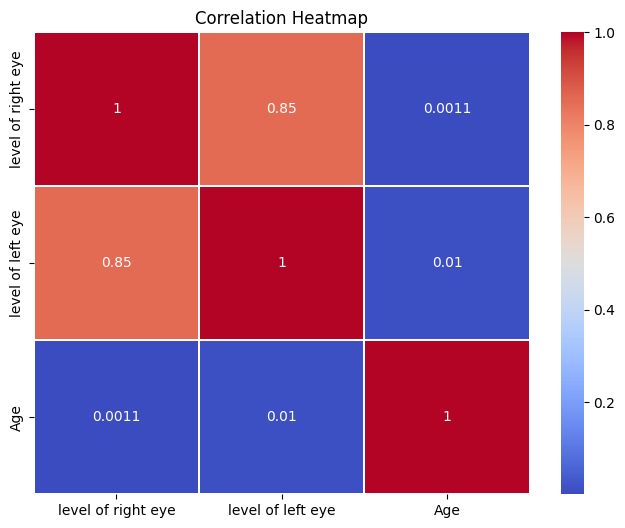

In [2]:
# Heat map
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()


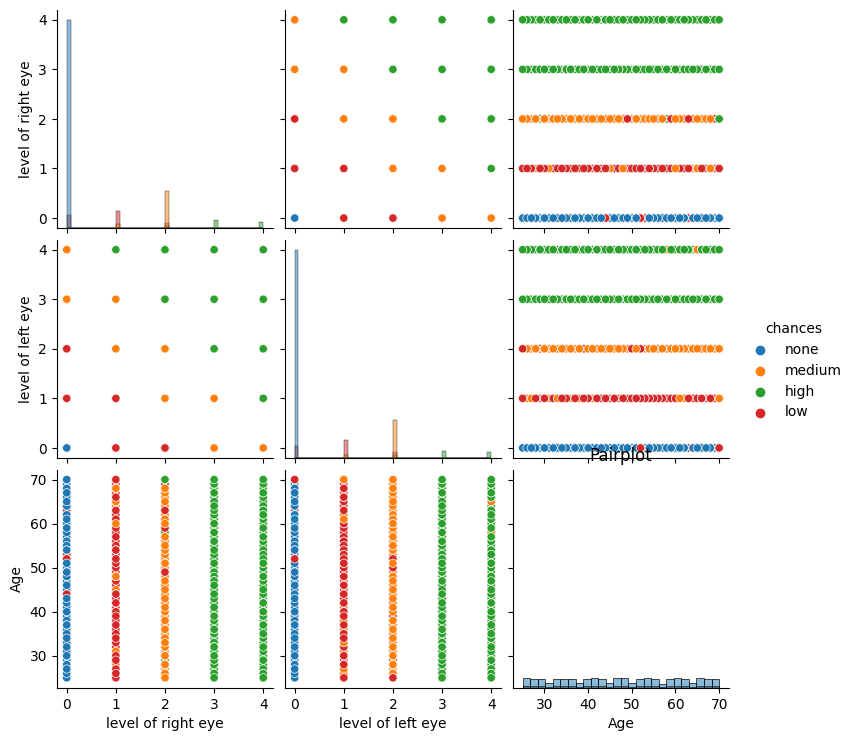

In [3]:
# Correlation plot
sns.pairplot(data, hue='chances', vars=['level of right eye', 'level of left eye', 'Age'], diag_kind='hist')
plt.title('Pairplot')
plt.show()

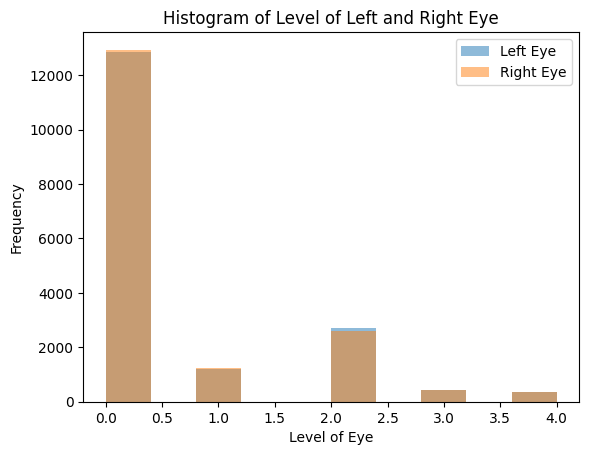

In [4]:
# Histogram & Bar graph
plt.hist(data['level of left eye'], bins=10, alpha=0.5, label='Left Eye')
plt.hist(data['level of right eye'], bins=10, alpha=0.5, label='Right Eye')
plt.xlabel('Level of Eye')
plt.ylabel('Frequency')
plt.title('Histogram of Level of Left and Right Eye')
plt.legend()
plt.show()


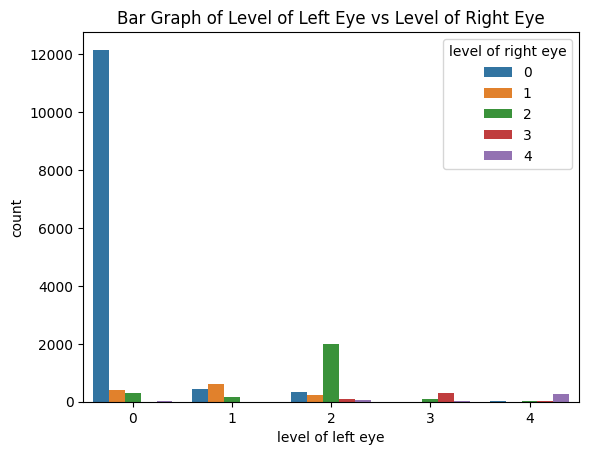

In [5]:
#countplot
sns.countplot(x='level of left eye', hue='level of right eye', data=data)
plt.title('Bar Graph of Level of Left Eye vs Level of Right Eye')
plt.show()


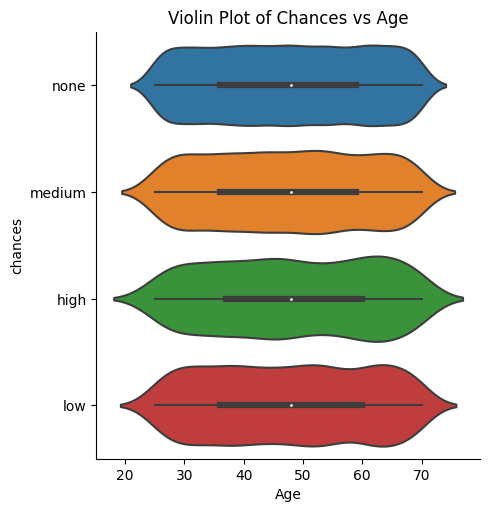

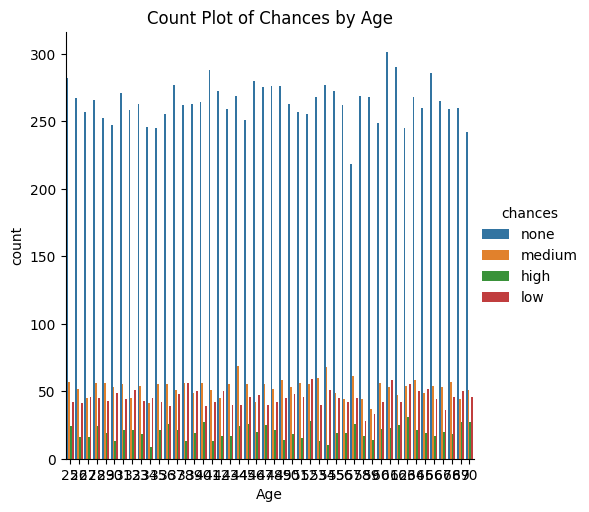

In [6]:
# Ratio Graphs
sns.catplot(x='Age', y='chances', kind='violin', data=data)
plt.title('Violin Plot of Chances vs Age')
plt.show()

sns.catplot(x='Age', hue='chances', kind='count', data=data)
plt.title('Count Plot of Chances by Age')
plt.show()

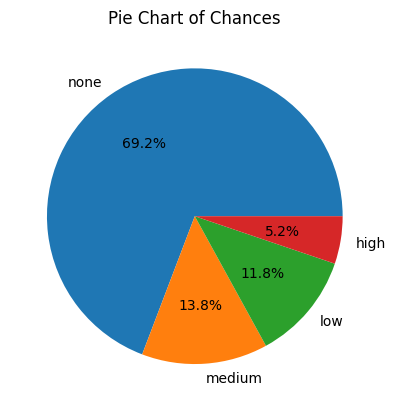

In [7]:
# Pie chart
pie_data = data['chances'].value_counts()
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%')
plt.title('Pie Chart of Chances')
plt.show()

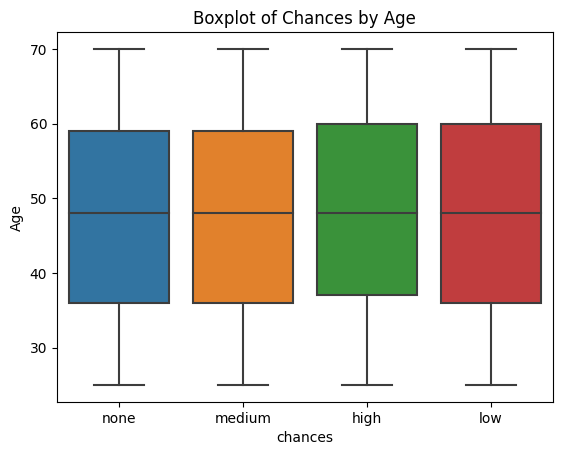

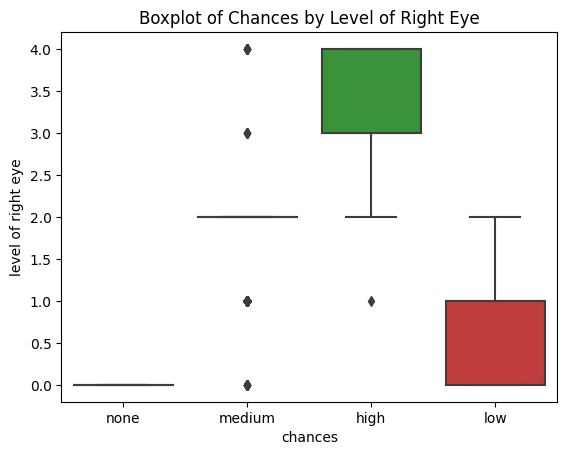

In [8]:
# Box plots
sns.boxplot(x='chances', y='Age', data=data)
plt.title('Boxplot of Chances by Age')
plt.show()

sns.boxplot(x='chances', y='level of right eye', data=data)
plt.title('Boxplot of Chances by Level of Right Eye')
plt.show()


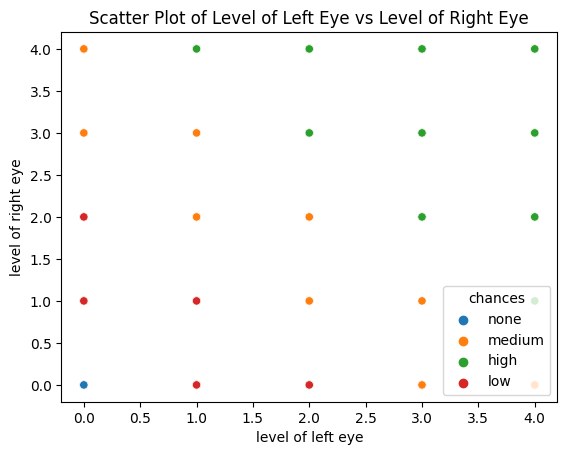

In [9]:
# Scatter plot
sns.scatterplot(x='level of left eye', y='level of right eye', hue='chances', data=data)
plt.title('Scatter Plot of Level of Left Eye vs Level of Right Eye')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


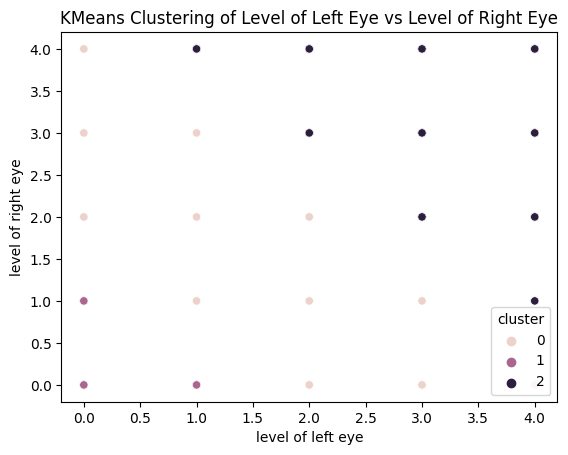

In [10]:
# Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['level of left eye', 'level of right eye']])
data['cluster'] = kmeans.labels_

sns.scatterplot(x='level of left eye', y='level of right eye', hue='cluster', data=data)
plt.title('KMeans Clustering of Level of Left Eye vs Level of Right Eye')
plt.show()

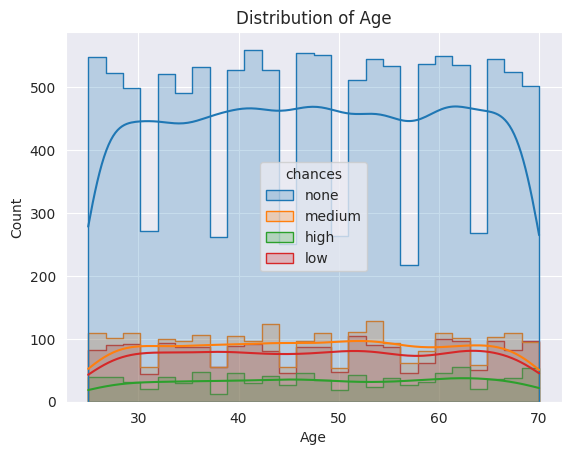

In [11]:
# Plot histogram of age
sns.set_style('darkgrid')
sns.histplot(data=data, x='Age', hue='chances', element='step', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


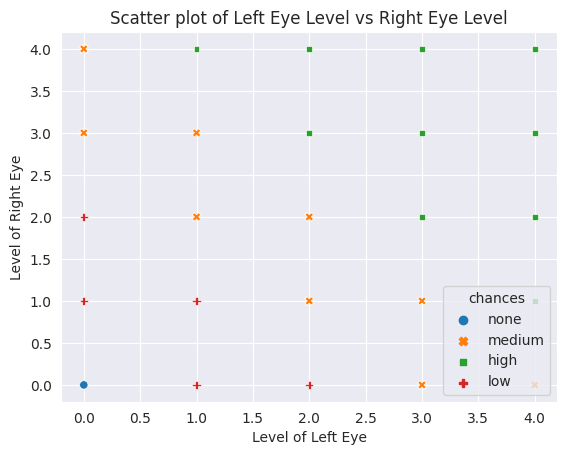

In [12]:
# Plot scatter plot of left eye level vs right eye level
sns.set_style('darkgrid')
sns.scatterplot(data=data, x='level of left eye', y='level of right eye', hue='chances', style='chances')
plt.title('Scatter plot of Left Eye Level vs Right Eye Level')
plt.xlabel('Level of Left Eye')
plt.ylabel('Level of Right Eye')
plt.show()

In [13]:
# Split data into features and target
X = data[['Age', 'level of left eye', 'level of right eye']]
y = data['chances']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 278    0    0    0]
 [   0  602    0    3]
 [   0    0  745    0]
 [   0    0    0 3641]]
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       278
         low       1.00      1.00      1.00       605
      medium       1.00      1.00      1.00       745
        none       1.00      1.00      1.00      3641

    accuracy                           1.00      5269
   macro avg       1.00      1.00      1.00      5269
weighted avg       1.00      1.00      1.00      5269



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


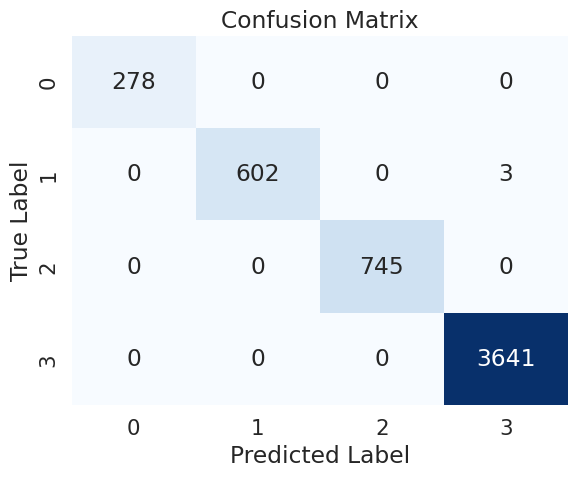

In [14]:
# Create a heatmap plot of confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()